In [8]:
import pandas as pd
import numpy as np

# Load the data
file_path = './precipitation_data.xlsx'
data = pd.read_excel(file_path, header=None)

# Extract longitude and latitude from the first two rows
longitude = data.iloc[0, 1:].values  # Longitude in the first row
latitude = data.iloc[1, 1:].values   # Latitude in the second row

# Extract daily precipitation data
precipitation_values = data.iloc[2:].reset_index(drop=True)

# Generate artificial dates for daily data (assuming daily data from 1965-01-01)
start_date = "1965-01-01"
dates = pd.date_range(start=start_date, periods=len(precipitation_values), freq="D")

# Assign column names: Date + Latitude-Longitude pairs
precipitation_values.columns = ["Date"] + [f"{lat},{lon}" for lat, lon in zip(latitude, longitude)]
precipitation_values["Date"] = dates

# Display the first few rows of the structured data
print(precipitation_values.head())


        Date  23.5,92.5  23.5,93.5  24.5,91.5  24.5,92.5  24.5,93.5  \
0 1965-01-01        0.0        0.0        0.0   0.000000   0.000000   
1 1965-01-02        0.0        0.0        0.0   0.000000   0.000000   
2 1965-01-03        0.0        0.0        0.0   0.000000   0.000000   
3 1965-01-04        0.0        0.0        0.0   0.000000   0.000000   
4 1965-01-05        0.0        0.0        0.0   0.208477   0.478065   

   24.5,94.5  25.5,90.5  25.5,91.5  25.5,92.5  ...  27.5,92.5  27.5,93.5  \
0        0.0        0.0   0.000000   0.000000  ...   0.000000   0.000000   
1        0.0        0.0   0.000000   0.000000  ...   0.000000   0.000000   
2        0.0        0.0   0.000000   0.000000  ...   0.000000   0.000000   
3        0.0        0.0   0.000000   0.000000  ...   0.000000   0.000000   
4        0.0        0.0   1.877032   3.606973  ...   7.945834   7.846818   

   27.5,94.5  27.5,95.5  27.5,96.5  28.5,91.5  28.5,92.5  28.5,93.5  \
0   0.000000    0.00000   0.000000   0.000000

In [9]:
# Check for missing values
missing_summary = precipitation_values.isnull().sum()
print("Missing Values Summary:\n", missing_summary)

# Fill missing values with linear interpolation
precipitation_values.iloc[:, 1:] = precipitation_values.iloc[:, 1:].interpolate(method='linear', axis=0)

# Confirm no missing values remain
print("Missing Values After Imputation:", precipitation_values.isnull().sum().sum())


Missing Values Summary:
 Date         0
23.5,92.5    0
23.5,93.5    0
24.5,91.5    0
24.5,92.5    0
24.5,93.5    0
24.5,94.5    0
25.5,90.5    0
25.5,91.5    0
25.5,92.5    0
25.5,93.5    0
25.5,94.5    0
26.5,90.5    0
26.5,91.5    0
26.5,92.5    0
26.5,93.5    0
26.5,94.5    0
26.5,95.5    0
27.5,90.5    0
27.5,91.5    0
27.5,92.5    0
27.5,93.5    0
27.5,94.5    0
27.5,95.5    0
27.5,96.5    0
28.5,91.5    0
28.5,92.5    0
28.5,93.5    0
28.5,94.5    0
28.5,95.5    0
dtype: int64
Missing Values After Imputation: 0


In [10]:
# Ensure the 'Date' column is in datetime format
precipitation_values["Date"] = pd.to_datetime(precipitation_values["Date"])

# Set 'Date' as the index
precipitation_values.set_index("Date", inplace=True)

# Define the function to assign seasons
def assign_season(month):
    if month in [11, 12, 1, 2]:  # November to February -> Winter
        return "Winter"
    elif month in [3, 4, 5, 6]:  # March to June -> Summer
        return "Summer"
    elif month in [7, 8, 9, 10]:  # July to October -> Monsoon
        return "Monsoon"

# Create a new column for 'Season'
precipitation_values["Season"] = precipitation_values.index.month.map(assign_season)

# Group data by 'Season' and calculate mean precipitation
seasonal_data = precipitation_values.groupby("Season").mean()

# Display the seasonal data
print(seasonal_data)


seasonal_data.to_csv("seasonal_precipitation.csv")


         23.5,92.5  23.5,93.5  24.5,91.5  24.5,92.5  24.5,93.5  24.5,94.5  \
Season                                                                      
Monsoon   8.513811   6.742806   8.795605   7.989484   5.975378   5.759271   
Summer    8.485887   5.944070   8.757782   7.830801   4.793596   4.396407   
Winter    0.847868   0.829585   0.779704   0.768388   0.661323   0.722740   

         25.5,90.5  25.5,91.5  25.5,92.5  25.5,93.5  ...  27.5,92.5  \
Season                                               ...              
Monsoon  14.029250   8.498672   6.657661   6.227189  ...   7.579940   
Summer   11.272165   7.808263   5.565561   4.984542  ...   6.766455   
Winter    0.428707   0.617756   0.560463   0.603360  ...   0.509372   

         27.5,93.5  27.5,94.5  27.5,95.5  27.5,96.5  28.5,91.5  28.5,92.5  \
Season                                                                      
Monsoon   7.546130  15.738563  15.746679  15.604741   8.534784   8.209897   
Summer    6.625324  11.8991

In [16]:
# Add a Date column to the DataFrame
# Assuming the dataset corresponds to daily data starting from 1965-01-01
start_date = "1965-01-01"
dates = pd.date_range(start=start_date, periods=len(precipitation_values), freq="D")

# Insert the Date column at the start of the DataFrame
precipitation_values.insert(0, "Date", dates)

# Save the updated DataFrame to a new file
precipitation_values.to_csv("updated_precipitation_data.csv", index=False)

# Display the first few rows to verify the Date column has been added
print(precipitation_values.head())


                 Date  23.5,92.5  23.5,93.5  24.5,91.5  24.5,92.5  24.5,93.5  \
Date                                                                           
1965-01-01 1965-01-01        0.0        0.0        0.0   0.000000   0.000000   
1965-01-02 1965-01-02        0.0        0.0        0.0   0.000000   0.000000   
1965-01-03 1965-01-03        0.0        0.0        0.0   0.000000   0.000000   
1965-01-04 1965-01-04        0.0        0.0        0.0   0.000000   0.000000   
1965-01-05 1965-01-05        0.0        0.0        0.0   0.208477   0.478065   

            24.5,94.5  25.5,90.5  25.5,91.5  25.5,92.5  ...  27.5,93.5  \
Date                                                    ...              
1965-01-01        0.0        0.0   0.000000   0.000000  ...   0.000000   
1965-01-02        0.0        0.0   0.000000   0.000000  ...   0.000000   
1965-01-03        0.0        0.0   0.000000   0.000000  ...   0.000000   
1965-01-04        0.0        0.0   0.000000   0.000000  ...   0.00000

In [7]:
!pip install pymannkendall


In [64]:
import pandas as pd

# Generate the 'Date' column
start_date = "1965-01-01"
dates = pd.date_range(start=start_date, periods=len(precipitation_values), freq="D")

# Add the 'Date' column to the DataFrame
precipitation_values.insert(0, "Date", dates)

# Verify the addition
print(precipitation_values.head())
# Convert 'Date' to datetime format
precipitation_values["Date"] = pd.to_datetime(precipitation_values["Date"])
# Set 'Date' as the index
precipitation_values.set_index("Date", inplace=True)
# Aggregate daily data into monthly averages
monthly_data = precipitation_values.resample("M").mean()

# Save the monthly data to a CSV file
monthly_data.to_csv("monthly_precipitation_data.csv")

# Display the first few rows of the monthly data
print(monthly_data.head())



                 Date  23.5,92.5  23.5,93.5  24.5,91.5  24.5,92.5  24.5,93.5  \
Date                                                                           
1965-01-01 1965-01-01        0.0        0.0        0.0   0.000000   0.000000   
1965-01-02 1965-01-02        0.0        0.0        0.0   0.000000   0.000000   
1965-01-03 1965-01-03        0.0        0.0        0.0   0.000000   0.000000   
1965-01-04 1965-01-04        0.0        0.0        0.0   0.000000   0.000000   
1965-01-05 1965-01-05        0.0        0.0        0.0   0.208477   0.478065   

            24.5,94.5  25.5,90.5  25.5,91.5  25.5,92.5  ...  27.5,93.5  \
Date                                                    ...              
1965-01-01        0.0        0.0   0.000000   0.000000  ...   0.000000   
1965-01-02        0.0        0.0   0.000000   0.000000  ...   0.000000   
1965-01-03        0.0        0.0   0.000000   0.000000  ...   0.000000   
1965-01-04        0.0        0.0   0.000000   0.000000  ...   0.00000

TypeError: agg function failed [how->mean,dtype->object]

In [66]:
import pandas as pd

# Ensure Date column exists and is set as the index
start_date = "1965-01-01"
dates = pd.date_range(start=start_date, periods=len(precipitation_values), freq="D")
precipitation_values.insert(0, "Date", dates)
precipitation_values["Date"] = pd.to_datetime(precipitation_values["Date"])
precipitation_values.set_index("Date", inplace=True)

# Exclude the 'Season' column
numeric_data = precipitation_values.drop(columns=["Season"])

# Aggregate daily data into monthly averages
monthly_data = numeric_data.resample("M").mean()

# Save the aggregated data
monthly_data.to_csv("monthly_precipitation_data_cleaned.csv")

# Display the first few rows of the monthly data
print(monthly_data.head())


            23.5,92.5  23.5,93.5  24.5,91.5  24.5,92.5  24.5,93.5  24.5,94.5  \
Date                                                                           
1965-01-31   0.000000   0.000000   0.000000   0.006725   0.015421   0.000000   
1965-02-28   2.220817   2.200827   2.218842   2.200071   2.170837   2.185947   
1965-03-31   2.296727   2.537522   2.294831   2.375864   2.609505   2.670877   
1965-04-30   1.901571   2.370028   1.900253   2.097619   2.609016   2.629152   
1965-05-31   4.723237   3.379654   4.727543   4.315014   3.032453   2.625898   

            25.5,90.5  25.5,91.5  25.5,92.5  25.5,93.5  ...  27.5,92.5  \
Date                                                    ...              
1965-01-31   0.000000   0.060549   0.116354   0.040164  ...   0.256317   
1965-02-28   0.836781   2.093020   2.046765   2.139985  ...   1.874661   
1965-03-31   2.658637   2.303142   2.238200   2.525312  ...   1.724149   
1965-04-30   2.887036   2.316822   2.551533   2.608485  ...   2.47499

In [69]:
import pymannkendall as mk

# Example: Analyze trend for a single grid point
grid_point = monthly_data.iloc[:, 0]  # Select the first grid point for analysis

# Perform Mann-Kendall Test
trend_result = mk.original_test(grid_point)


#print("Trend:", trend_result.trend)   Increasing, Decreasing, or No trend
#print("p-value:", trend_result.p)    # Statistical significance
#print("Slope:", trend_result.slope)  # Rate of change
# Perform trend analysis for all grid points
trend_results = {}
for column in monthly_data.columns:
    trend_result = mk.original_test(monthly_data[column])
    trend_results[column] = {
        "Trend": trend_result.trend,
        "p-value": trend_result.p,
        "Slope": trend_result.slope,
    }

# Convert the results to a DataFrame
trend_results_df = pd.DataFrame.from_dict(trend_results, orient="index")
print(trend_results_df.head())


                Trend   p-value     Slope
23.5,92.5  decreasing  0.019068 -0.001485
23.5,93.5  decreasing  0.007702 -0.001467
24.5,91.5  decreasing  0.044332 -0.001142
24.5,92.5  decreasing  0.029620 -0.001130
24.5,93.5    no trend  0.156908 -0.000595


In [70]:
import matplotlib.pyplot as plt

# Prepare longitude, latitude, and trend data
trend_results_df["Longitude"] = trend_results_df["Grid_Point"].apply(lambda x: float(x.split(",")[1]))
trend_results_df["Latitude"] = trend_results_df["Grid_Point"].apply(lambda x: float(x.split(",")[0]))

# Assign colors based on trend type
color_map = {
    "increasing": "blue",
    "decreasing": "red",
    "no trend": "gray",
}
trend_results_df["Color"] = trend_results_df["Trend"].map(color_map)

# Scatter plot of Mann-Kendall trends
plt.figure(figsize=(12, 6))
plt.scatter(
    trend_results_df["Longitude"],
    trend_results_df["Latitude"],
    c=trend_results_df["Color"],
    s=50,
    alpha=0.8,
    edgecolor="black"
)
plt.title("Spatial Visualization of Mann-Kendall Trends")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Trend Type")
plt.grid(True)
plt.show()


KeyError: 'Grid_Point'

In [71]:
print(trend_results_df.head())


                Trend   p-value     Slope
23.5,92.5  decreasing  0.019068 -0.001485
23.5,93.5  decreasing  0.007702 -0.001467
24.5,91.5  decreasing  0.044332 -0.001142
24.5,92.5  decreasing  0.029620 -0.001130
24.5,93.5    no trend  0.156908 -0.000595


In [72]:
# Reset the index to include grid points as a column
trend_results_df.reset_index(inplace=True)

# Rename the index column
trend_results_df.rename(columns={"index": "Grid_Point"}, inplace=True)

# Extract Latitude and Longitude from the Grid_Point column
trend_results_df["Latitude"] = trend_results_df["Grid_Point"].apply(lambda x: float(x.split(",")[0]))
trend_results_df["Longitude"] = trend_results_df["Grid_Point"].apply(lambda x: float(x.split(",")[1]))

# Verify the updated DataFrame
print(trend_results_df.head())



  Grid_Point       Trend   p-value     Slope  Latitude  Longitude
0  23.5,92.5  decreasing  0.019068 -0.001485      23.5       92.5
1  23.5,93.5  decreasing  0.007702 -0.001467      23.5       93.5
2  24.5,91.5  decreasing  0.044332 -0.001142      24.5       91.5
3  24.5,92.5  decreasing  0.029620 -0.001130      24.5       92.5
4  24.5,93.5    no trend  0.156908 -0.000595      24.5       93.5


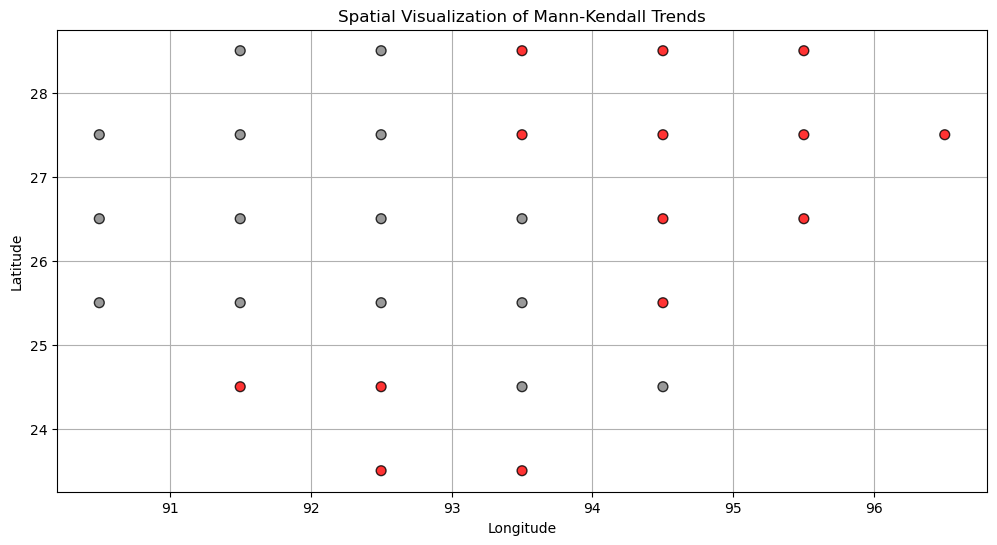

In [73]:
import matplotlib.pyplot as plt

# Assign colors based on trend type
color_map = {
    "increasing": "blue",
    "decreasing": "red",
    "no trend": "gray",
}
trend_results_df["Color"] = trend_results_df["Trend"].map(color_map)

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(
    trend_results_df["Longitude"],
    trend_results_df["Latitude"],
    c=trend_results_df["Color"],
    s=50,
    alpha=0.8,
    edgecolor="black"
)
plt.title("Spatial Visualization of Mann-Kendall Trends")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
trend_results_df.to_csv("mann_kendall_trends_with_coordinates.csv", index=False)


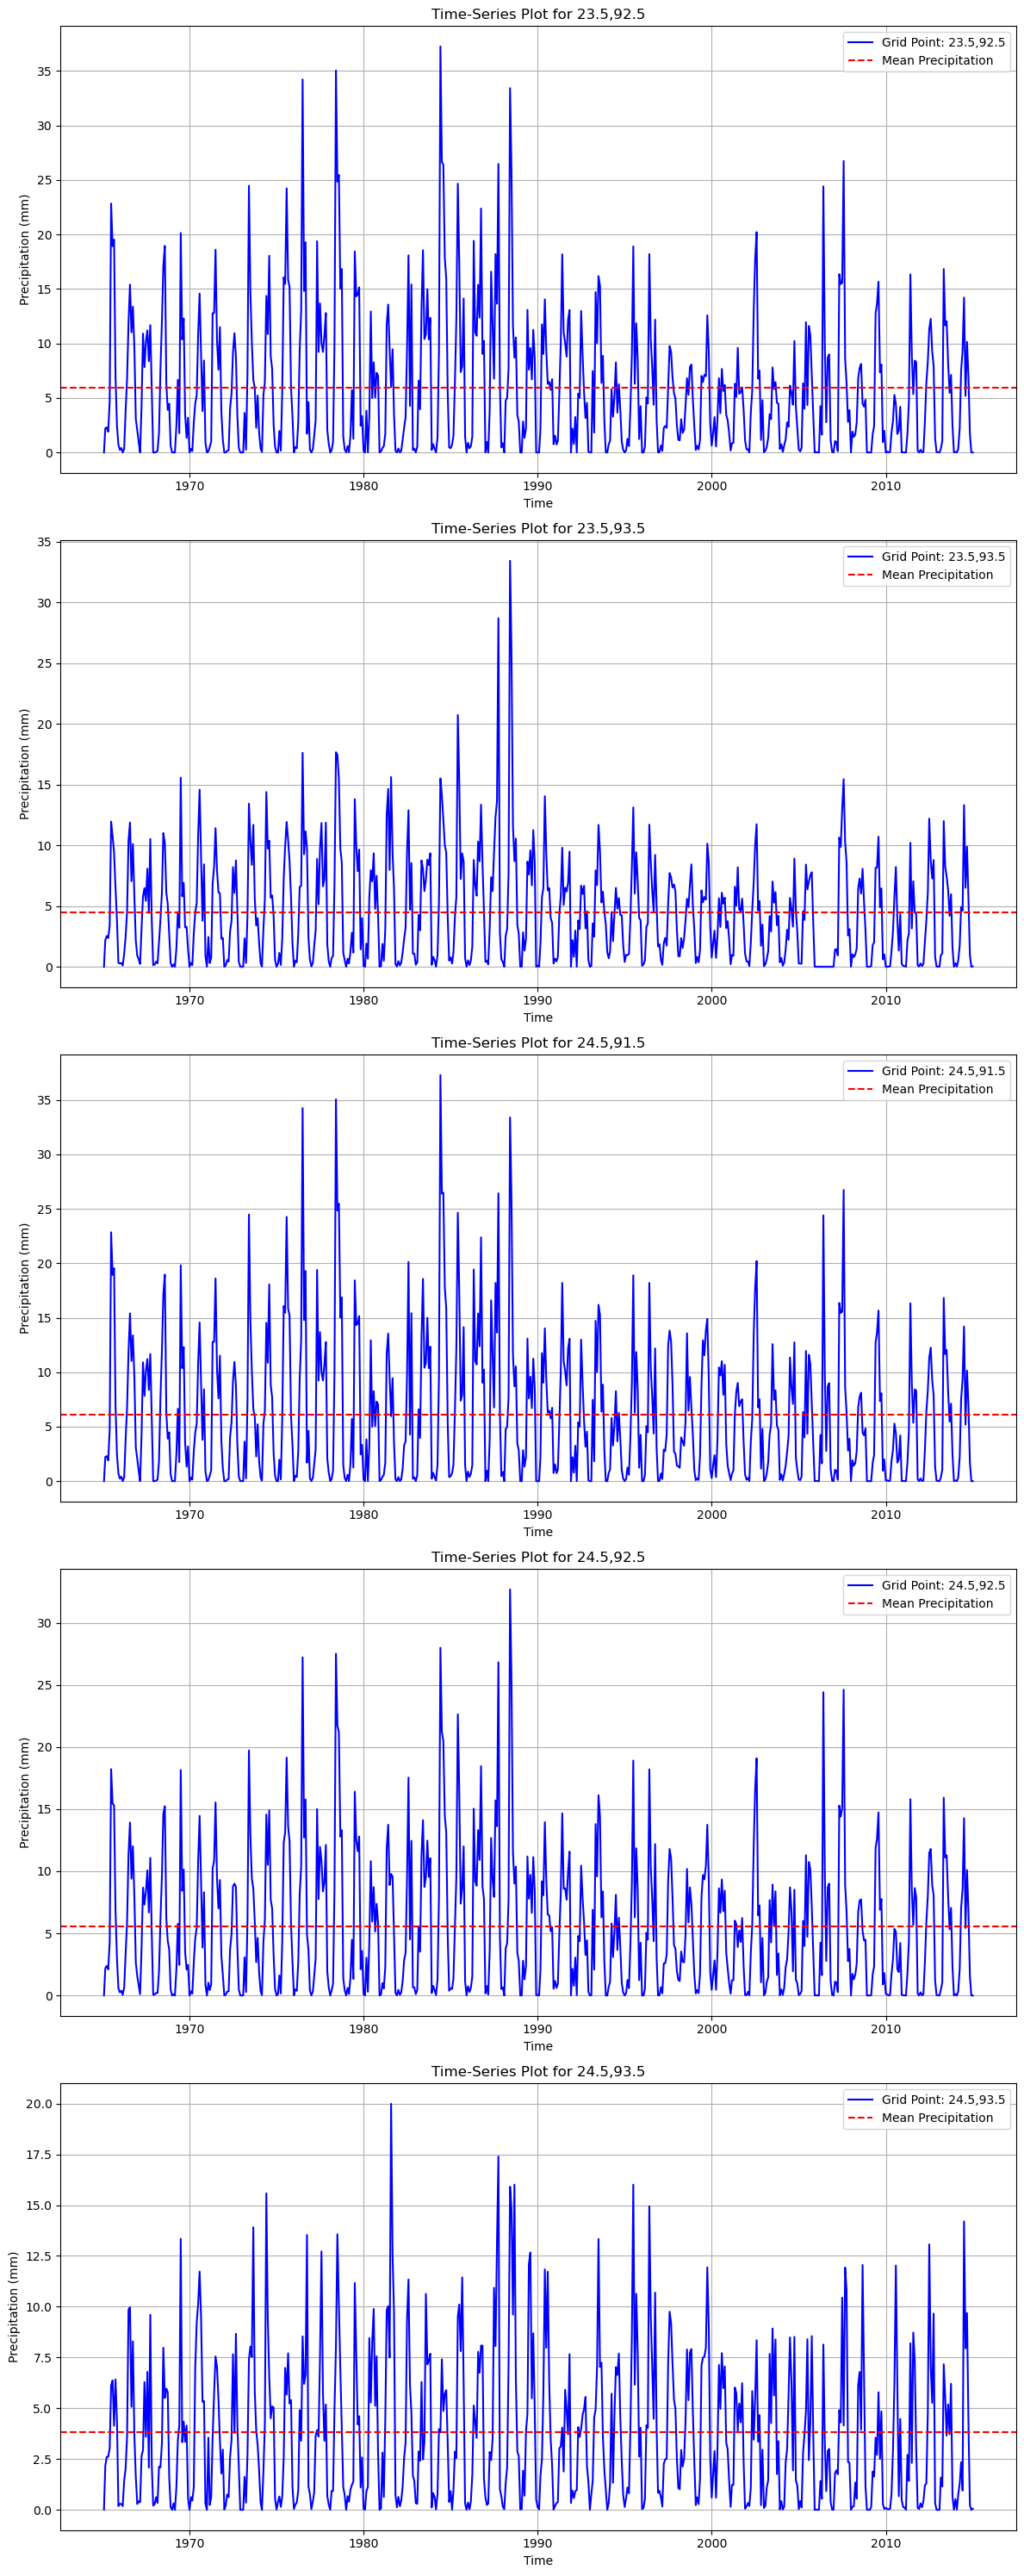

In [74]:
import matplotlib.pyplot as plt

# Number of grid points to visualize
num_plots = 5

# Create a figure for the plots
plt.figure(figsize=(12, 6 * num_plots))

# Loop through selected grid points
for i, column in enumerate(monthly_data.columns[:num_plots], start=1):
    plt.subplot(num_plots, 1, i)  # Create subplots
    plt.plot(monthly_data.index, monthly_data[column], label=f"Grid Point: {column}", color="blue")
    plt.axhline(monthly_data[column].mean(), color="red", linestyle="--", label="Mean Precipitation")
    plt.title(f"Time-Series Plot for {column}")
    plt.xlabel("Time")
    plt.ylabel("Precipitation (mm)")
    plt.legend()
    plt.grid()

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


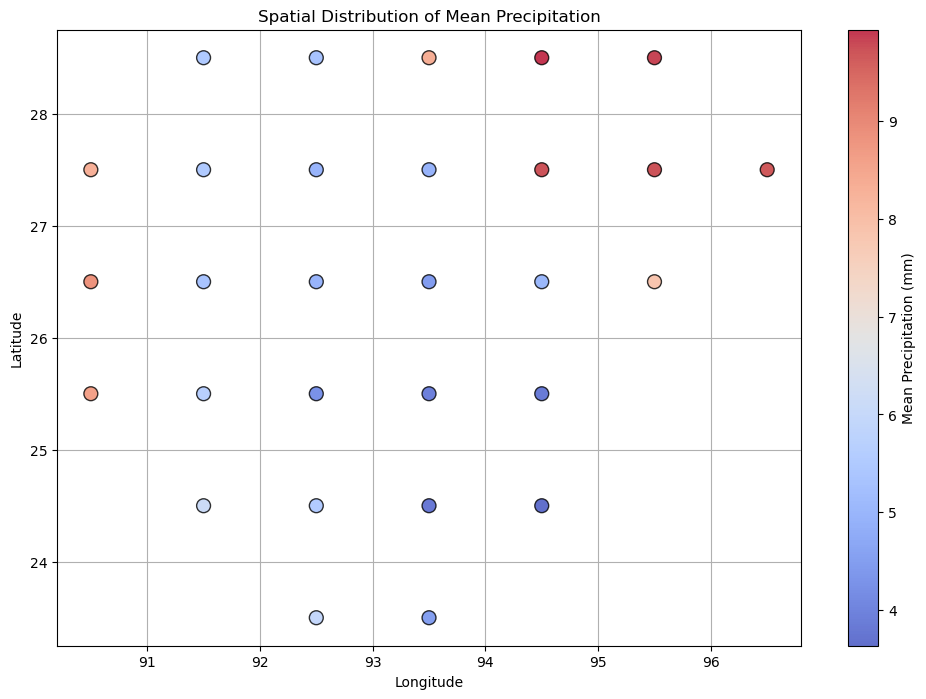

In [75]:
import matplotlib.pyplot as plt

# Extract longitude and latitude from the grid points
trend_results_df["Longitude"] = trend_results_df["Grid_Point"].apply(lambda x: float(x.split(",")[1]))
trend_results_df["Latitude"] = trend_results_df["Grid_Point"].apply(lambda x: float(x.split(",")[0]))

# Calculate mean precipitation for each grid point
mean_precipitation = monthly_data.mean()

# Add mean precipitation to trend_results_df
trend_results_df["Mean_Precipitation"] = trend_results_df["Grid_Point"].map(mean_precipitation)

# Scatter plot for spatial distribution
plt.figure(figsize=(12, 8))
sc = plt.scatter(
    trend_results_df["Longitude"],
    trend_results_df["Latitude"],
    c=trend_results_df["Mean_Precipitation"],
    cmap="coolwarm",
    s=100,
    alpha=0.8,
    edgecolor="black"
)
plt.colorbar(sc, label="Mean Precipitation (mm)")
plt.title("Spatial Distribution of Mean Precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


            23.5,92.5  23.5,93.5  24.5,91.5  24.5,92.5  24.5,93.5  24.5,94.5  \
Date                                                                           
1965-01-31   0.000000   0.000000   0.000000   0.006725   0.015421   0.000000   
1965-02-28   2.220817   2.200827   2.218842   2.200071   2.170837   2.185947   
1965-03-31   2.296727   2.537522   2.294831   2.375864   2.609505   2.670877   
1965-04-30   1.901571   2.370028   1.900253   2.097619   2.609016   2.629152   
1965-05-31   4.723237   3.379654   4.727543   4.315014   3.032453   2.625898   

            25.5,90.5  25.5,91.5  25.5,92.5  25.5,93.5  ...  27.5,93.5  \
Date                                                    ...              
1965-01-31   0.000000   0.060549   0.116354   0.040164  ...   0.271859   
1965-02-28   0.836781   2.093020   2.046765   2.139985  ...   1.992943   
1965-03-31   2.658637   2.303142   2.238200   2.525312  ...   1.848366   
1965-04-30   2.887036   2.316822   2.551533   2.608485  ...   2.72221

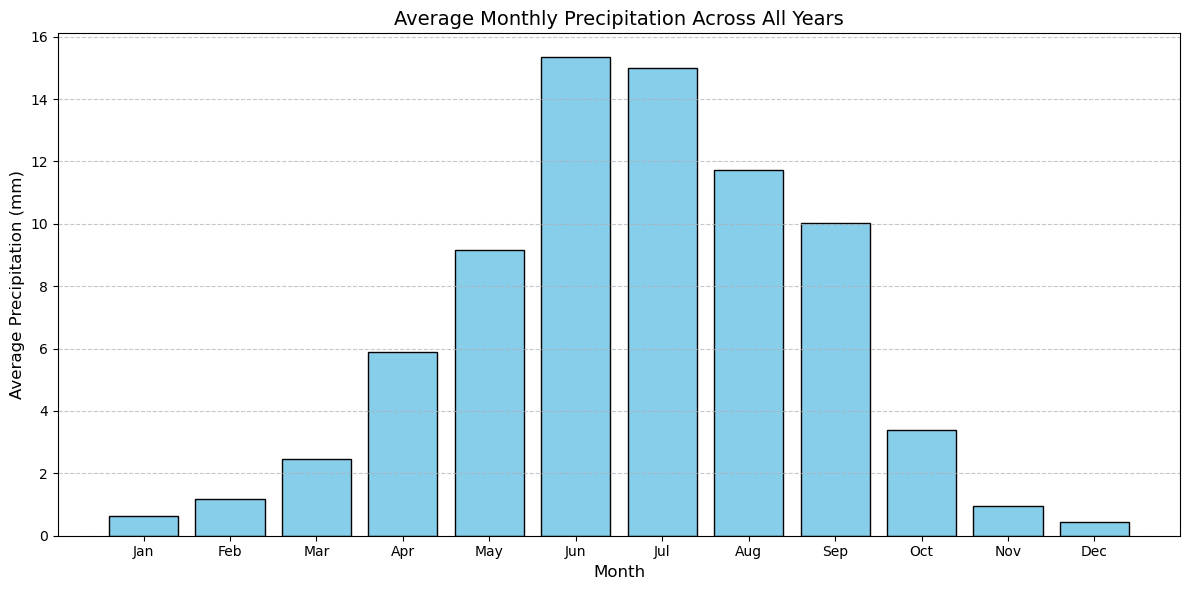

In [86]:
# Ensure the Date column is set as the index
monthly_data.index = pd.to_datetime(monthly_data.index)

# Extract the month from the Date index and add it as a new column
monthly_data["Month"] = monthly_data.index.month

# Verify the DataFrame structure
print(monthly_data.head())

# Group by month and calculate average precipitation
monthly_pattern = monthly_data.groupby("Month").mean().mean(axis=1)

# Verify the monthly pattern
print("Monthly Pattern:\n", monthly_pattern)

# Plot the average monthly precipitation
plt.figure(figsize=(12, 6))
plt.bar(
    x=range(1, 13),
    height=monthly_pattern,
    color="skyblue",
    edgecolor="black"
)
plt.title("Average Monthly Precipitation Across All Years", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Precipitation (mm)", fontsize=12)
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



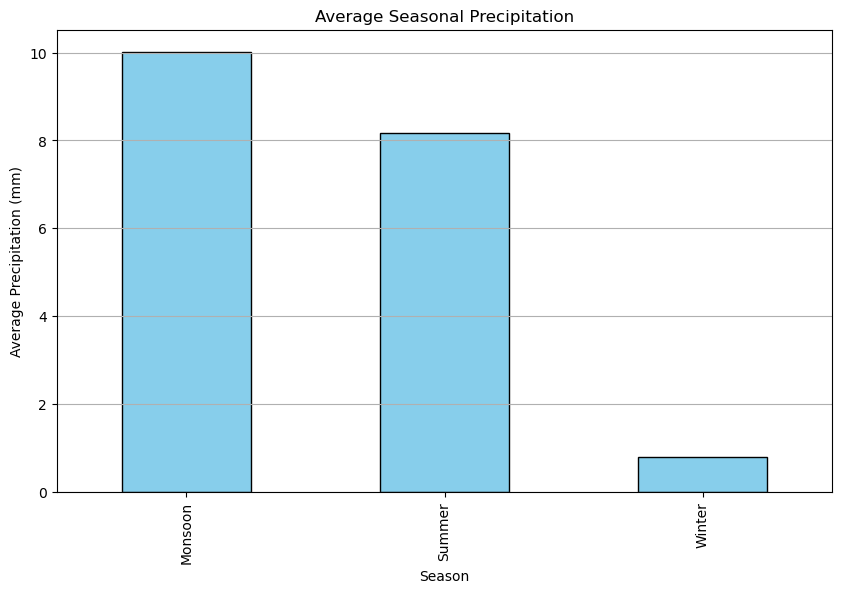

In [90]:
# Plot seasonal averages
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
seasonal_data.mean(axis=1).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Seasonal Precipitation")
plt.xlabel("Season")
plt.ylabel("Average Precipitation (mm)")
plt.grid(axis="y")
plt.show()




d:\Staad\PictoBlox\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Staad\PictoBlox\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Staad\PictoBlox\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Staad\PictoBlox\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THRE

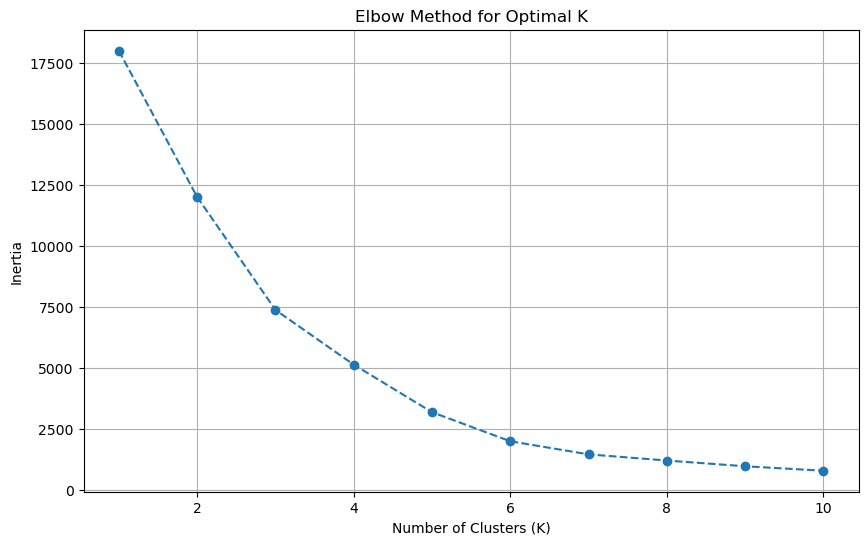

In [92]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Prepare Data (Transpose the dataset to make grid points as rows)
clustering_data = monthly_data.T

# Step 2: Normalize Data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Step 3: Calculate Inertia for Different K Values
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


d:\Staad\PictoBlox\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Staad\PictoBlox\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Staad\PictoBlox\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Staad\PictoBlox\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THRE

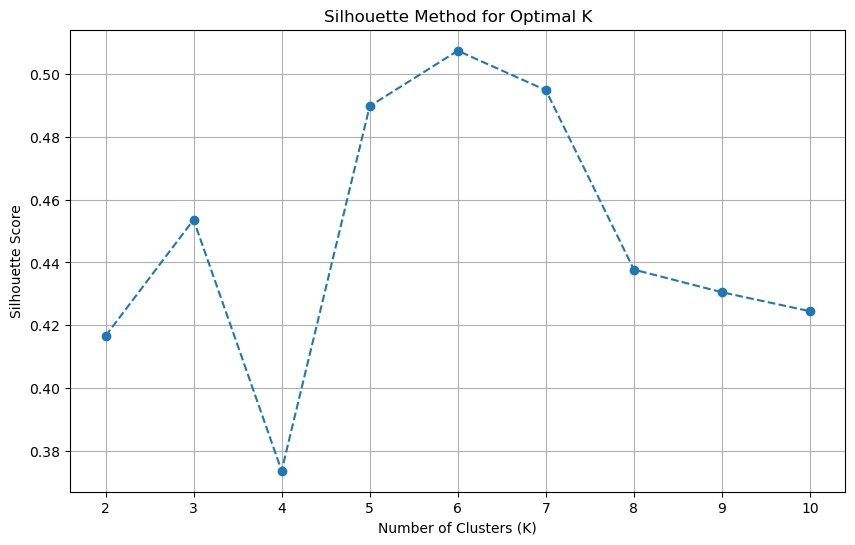

In [93]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate silhouette scores for different k values
silhouette_scores = []
k_values = range(2, 11)  # Silhouette requires at least 2 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data_scaled)
    silhouette_avg = silhouette_score(clustering_data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()



In [ ]:
# Optimal number of clusters from the elbow plot (replace `optimal_k` with your selected value)
optimal_k = 6

# Apply K-Means with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to the data
clustering_data["Cluster"] = clusters

# Display the cluster counts
print(clustering_data["Cluster"].value_counts())
clustering_data.to_csv("clustered_precipitation_data.csv")


d:\Staad\PictoBlox\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Staad\PictoBlox\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster
3    9
1    7
2    7
5    3
0    3
4    1
Name: count, dtype: int64


In [105]:
# Check if all values in the index column are properly formatted as "latitude,longitude"
invalid_rows = clustering_data["index"].apply(lambda x: len(x.split(",")) != 2)
print("Invalid Rows:\n", clustering_data[invalid_rows])


Invalid Rows:
 Date  index  1965-01-31 00:00:00  1965-02-28 00:00:00  1965-03-31 00:00:00  \
29    Month                  1.0                  2.0                  3.0   

Date  1965-04-30 00:00:00  1965-05-31 00:00:00  1965-06-30 00:00:00  \
29                    4.0                  5.0                  6.0   

Date  1965-07-31 00:00:00  1965-08-31 00:00:00  1965-09-30 00:00:00  ...  \
29                    7.0                  8.0                  9.0  ...   

Date  2014-04-30 00:00:00  2014-05-31 00:00:00  2014-06-30 00:00:00  \
29                    4.0                  5.0                  6.0   

Date  2014-07-31 00:00:00  2014-08-31 00:00:00  2014-09-30 00:00:00  \
29                    7.0                  8.0                  9.0   

Date  2014-10-31 00:00:00  2014-11-30 00:00:00  2014-12-31 00:00:00  Cluster  
29                   10.0                 11.0                 12.0        4  

[1 rows x 602 columns]


In [106]:
# Remove invalid rows
clustering_data = clustering_data[~invalid_rows]



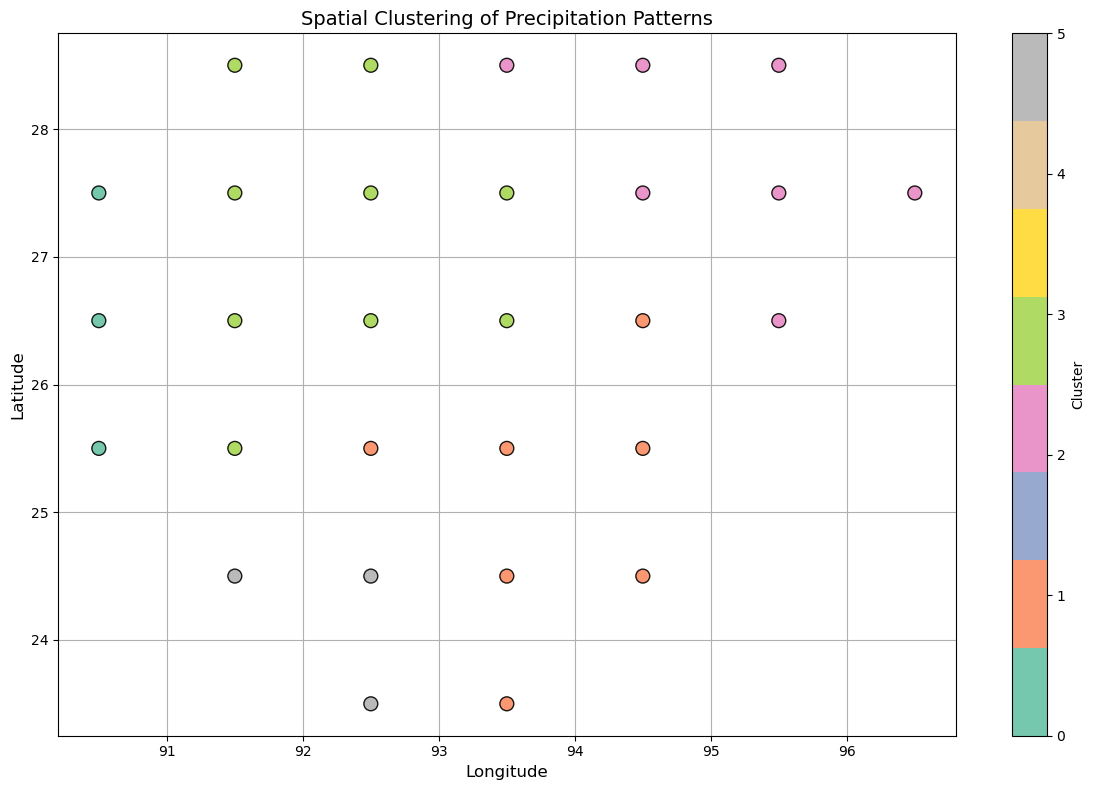

In [110]:
# Extract longitude and latitude
clustering_data["Longitude"] = clustering_data["index"].apply(lambda x: float(x.split(",")[1]))
clustering_data["Latitude"] = clustering_data["index"].apply(lambda x: float(x.split(",")[0]))

import matplotlib.pyplot as plt

# Scatter plot for spatial clustering with 6 distinct colors
plt.figure(figsize=(12, 8))
sc = plt.scatter(
    clustering_data["Longitude"],
    clustering_data["Latitude"],
    c=clustering_data["Cluster"],
    cmap="Set2",  # Use the 'Set2' colormap for distinct, visually appealing colors
    s=100,
    alpha=0.9,
    edgecolor="black"
)
plt.colorbar(sc, label="Cluster")
plt.title("Spatial Clustering of Precipitation Patterns", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Prepare Data (Transpose the dataset and reset index)
clustering_data = monthly_data.T
clustering_data.reset_index(inplace=True)
clustering_data.rename(columns={"index": "grid_point"}, inplace=True)

# Ensure 'grid_point' is treated as a string
clustering_data["grid_point"] = clustering_data["grid_point"].astype(str)

# Step 2: Validate 'grid_point'
def is_valid_grid_point(value):
    try:
        lat, lon = value.split(",")
        float(lat), float(lon)  # Ensure both parts are valid floats
        return True
    except Exception as e:
        print(f"Invalid grid_point: {value}, Error: {e}")
        return False

clustering_data["is_valid"] = clustering_data["grid_point"].apply(is_valid_grid_point)
clustering_data = clustering_data[clustering_data["is_valid"]]
clustering_data.drop(columns=["is_valid"], inplace=True)

# Step 3: Extract Longitude and Latitude
clustering_data["Longitude"] = clustering_data["grid_point"].apply(lambda x: float(x.split(",")[1]))
clustering_data["Latitude"] = clustering_data["grid_point"].apply(lambda x: float(x.split(",")[0]))

# Step 4: Normalize Data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data.iloc[:, 1:-2])  # Exclude grid_point, Longitude, Latitude

# Step 5: Apply DBSCAN Clustering
eps_value = 1.0  # Adjust based on K-distance elbow plot
min_samples_value = 5  # Minimum number of points to form a cluster

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(clustering_data_scaled)

# Step 6: Add Clusters to DataFrame
clustering_data["Cluster"] = clusters

# Step 7: Visualize Clusters
plt.figure(figsize=(12, 8))
sc = plt.scatter(
    clustering_data["Longitude"],
    clustering_data["Latitude"],
    c=clustering_data["Cluster"],
    cmap="tab10",  # Use distinct colors for clusters
    s=100,
    alpha=0.9,
    edgecolor="black"
)
plt.colorbar(sc, label="Cluster")
plt.title("Spatial Clustering of Precipitation Patterns (DBSCAN)", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Save the Results
output_file = "dbscan_clustered_precipitation_data.csv"
clustering_data.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")


Invalid grid_point: 91.5, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 92.5, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 93.5, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 91.5.1, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 92.5.1, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 93.5.1, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 94.5, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 90.5, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 91.5.2, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 92.5.2, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 93.5.2, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_point: 94.5.1, Error: not enough values to unpack (expected 2, got 1)
Invalid grid_p

ValueError: Found array with 0 sample(s) (shape=(0, 600)) while a minimum of 1 is required by StandardScaler.

Invalid grid_point: Season, Error: not enough values to unpack (expected 2, got 1)


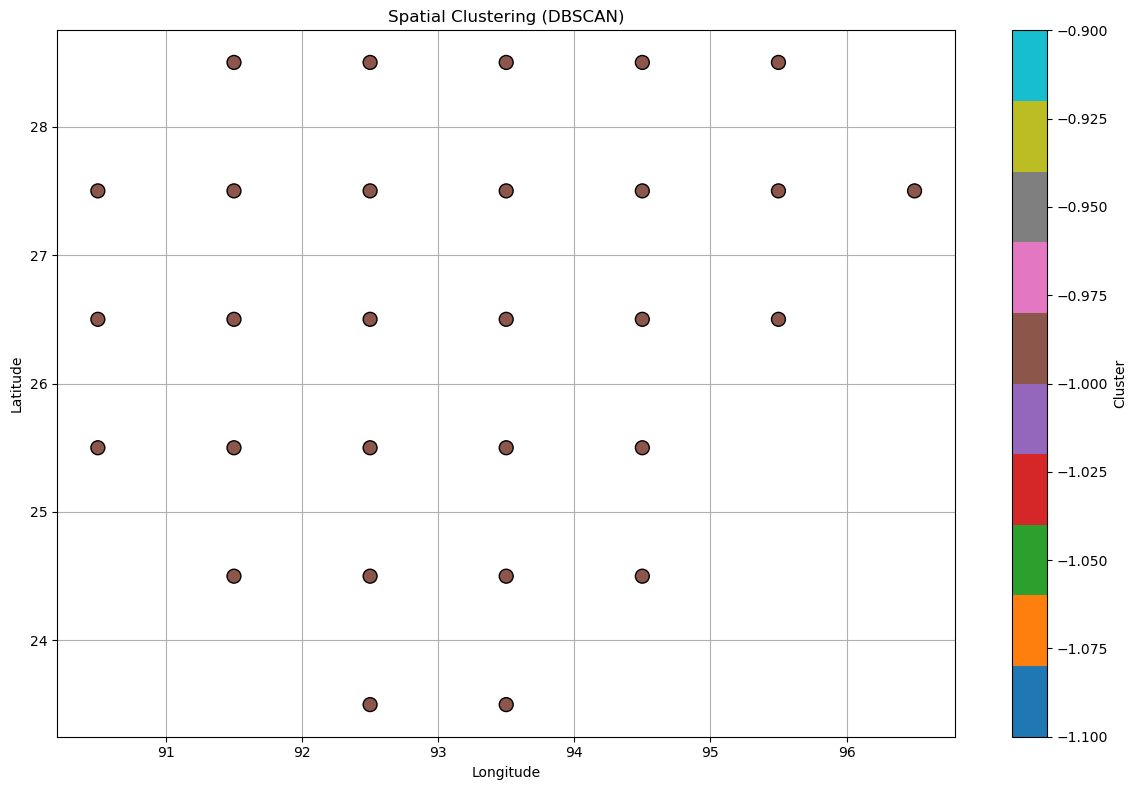

Clustered data saved to dbscan_clustered_precipitation.csv


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Dataset
file_path = "updated_precipitation_data.csv"  # Replace with your actual file path
clustering_data = pd.read_csv(file_path)

# Ensure the first column is treated as 'Date'
if "Date" in clustering_data.columns:
    clustering_data.set_index("Date", inplace=True)

# Transpose the data so grid points are rows
clustering_data = clustering_data.T
clustering_data.reset_index(inplace=True)
clustering_data.rename(columns={"index": "grid_point"}, inplace=True)

# Extract Latitude and Longitude from grid_point
def extract_lat_lon(grid_point):
    try:
        lat, lon = grid_point.split(",")
        return float(lat), float(lon)
    except Exception as e:
        print(f"Invalid grid_point: {grid_point}, Error: {e}")
        return None, None

clustering_data["Latitude"], clustering_data["Longitude"] = zip(*clustering_data["grid_point"].apply(extract_lat_lon))

# Drop rows with invalid grid points
clustering_data.dropna(subset=["Latitude", "Longitude"], inplace=True)

# Normalize Precipitation Data for Clustering
columns_to_normalize = clustering_data.columns.difference(["grid_point", "Latitude", "Longitude"])
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data[columns_to_normalize])

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=25.0, min_samples=2)
clustering_data["Cluster"] = dbscan.fit_predict(clustering_data_scaled)

# Visualize Clusters
plt.figure(figsize=(12, 8))
sc = plt.scatter(
    clustering_data["Longitude"],
    clustering_data["Latitude"],
    c=clustering_data["Cluster"],
    cmap="tab10",
    s=100,
    edgecolor="black"
)
plt.colorbar(sc, label="Cluster")
plt.title("Spatial Clustering (DBSCAN)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save Results
output_file = "dbscan_clustered_precipitation.csv"
clustering_data.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")
